<a href="https://colab.research.google.com/github/akash155/M.P.AKASH/blob/master/aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Analysis: Exam_Score
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


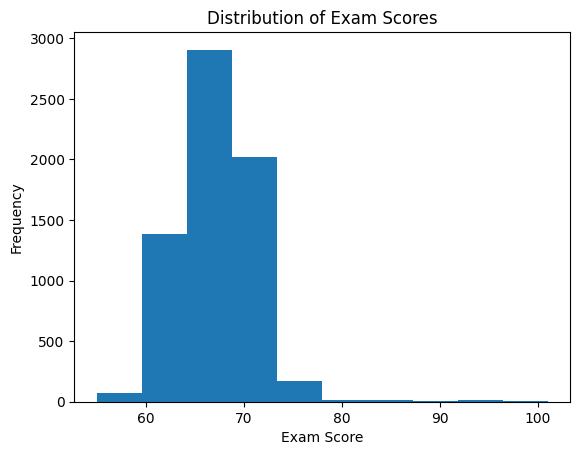

Outliers:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
94               18          89                 High              Medium   
106              31         100               Medium              Medium   
113              35          99                 High                High   
209              43          86                 High              Medium   
217              19          70               Medium                 Low   
...             ...         ...                  ...                 ...   
6347             28          96                 High                 Low   
6393             16          83                  Low              Medium   
6431              4          60               Medium              Medium   
6522             18          90                 High                High   
6566             29          96                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
94          

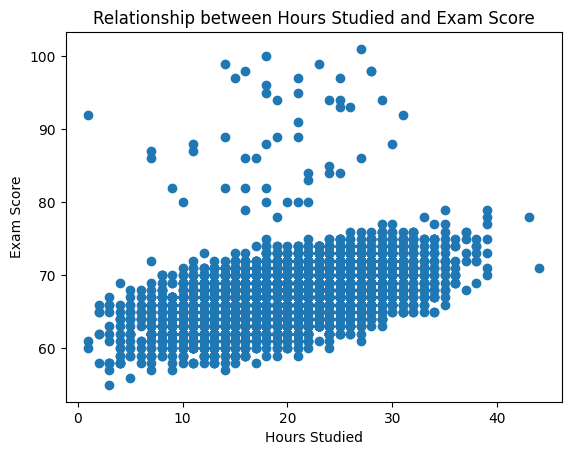

Correlation Coefficient: 0.44545495407528235
Coefficients:
Intercept: 61.51116746904424
Slope: [0.28566874]
R-squared: 0.2319868674542106


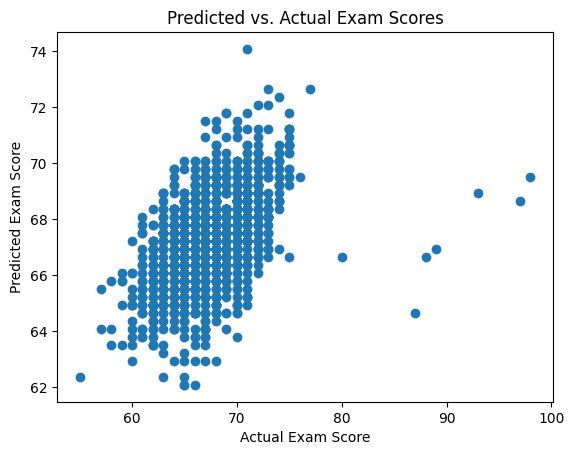

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/StudentPerformanceFactors.csv')

# Univariate Analysis: Exam_Score
print("Univariate Analysis: Exam_Score")
print(data['Exam_Score'].describe())

# Histogram
plt.hist(data['Exam_Score'], bins=10)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Identify outliers
Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Exam_Score'] < (Q1 - 1.5 * IQR)) | (data['Exam_Score'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

# Bivariate Analysis: Hours_Studied vs. Exam_Score
print("\nBivariate Analysis: Hours_Studied vs. Exam_Score")

# Scatter Plot
plt.scatter(data['Hours_Studied'], data['Exam_Score'])
plt.title('Relationship between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# Correlation Coefficient
correlation_coefficient = data['Hours_Studied'].corr(data['Exam_Score'])
print("Correlation Coefficient:", correlation_coefficient)

# Regression Analysis
X = data[['Hours_Studied']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Coefficients:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("R-squared:", r2_score(y_test, y_pred))

# Predicted vs. Actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Exam Scores')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.show()